In [ ]:
# clear output esc r y
# https://scikit-learn.org/stable/modules/unsupervised_reduction.html
# https://scikit-learn.org/stable/modules/feature_selection.html

#import csv
#with open('X_train.csv', newline='') as csvfile:
import pandas as pd
import numpy as np

xdata = pd.read_csv ('X_train.csv', nrows=5)
ydata = pd.read_csv('y_train.csv',nrows=5)

merged = pd.concat([xdata, ydata['y']], axis=1, sort=False)
print(xdata.drop(['id'],axis=1))
#print(ydata['y'])
#print(np.transpose(ydata.values)[1:][0])
#print(len(np.transpose(xdata.values)[1:]))



In [ ]:
########## DEBUT CLEAN

In [2]:
#imports, creates X and y arrays
import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_median.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(columns = ['id'])
y=ydata['y']
num_feats=250

In [3]:
# Pearson Correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(cor_feature), 'selected features')

['x321', 'x378', 'x591', 'x105', 'x656', 'x282', 'x452', 'x768', 'x435', 'x683', 'x573', 'x373', 'x431', 'x593', 'x551', 'x568', 'x84', 'x809', 'x409', 'x450', 'x106', 'x58', 'x345', 'x34', 'x253', 'x356', 'x698', 'x197', 'x382', 'x668', 'x687', 'x251', 'x131', 'x507', 'x624', 'x520', 'x138', 'x326', 'x482', 'x594', 'x296', 'x91', 'x309', 'x187', 'x191', 'x381', 'x62', 'x69', 'x403', 'x118', 'x22', 'x813', 'x437', 'x274', 'x734', 'x739', 'x12', 'x240', 'x736', 'x486', 'x637', 'x462', 'x692', 'x552', 'x254', 'x291', 'x280', 'x371', 'x783', 'x467', 'x764', 'x499', 'x786', 'x329', 'x80', 'x264', 'x766', 'x233', 'x66', 'x415', 'x265', 'x185', 'x416', 'x279', 'x508', 'x775', 'x696', 'x127', 'x273', 'x648', 'x566', 'x581', 'x200', 'x827', 'x550', 'x102', 'x689', 'x126', 'x344', 'x75', 'x283', 'x476', 'x148', 'x477', 'x10', 'x461', 'x666', 'x432', 'x25', 'x406', 'x665', 'x525', 'x199', 'x247', 'x301', 'x28', 'x121', 'x487', 'x797', 'x749', 'x560', 'x578', 'x723', 'x139', 'x745', 'x93', 'x123'

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [6]:
# Chi squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


250 selected features


In [9]:
#Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(max_iter=2000), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 832 features.
Fitting estimator with 822 features.
Fitting estimator with 812 features.
Fitting estimator with 802 features.
Fitting estimator with 792 features.
Fitting estimator with 782 features.
Fitting estimator with 772 features.
Fitting estimator with 762 features.
Fitting estimator with 752 features.
Fitting estimator with 742 features.
Fitting estimator with 732 features.
Fitting estimator with 722 features.
Fitting estimator with 712 features.
Fitting estimator with 702 features.
Fitting estimator with 692 features.
Fitting estimator with 682 features.
Fitting estimator with 672 features.
Fitting estimator with 662 features.
Fitting estimator with 652 features.
Fitting estimator with 642 features.
Fitting estimator with 632 features.
Fitting estimator with 622 features.
Fitting estimator with 612 features.
Fitting estimator with 602 features.
Fitting estimator with 592 features.
Fitting estimator with 582 features.
Fitting estimator with 572 features.
F

In [11]:
#Lasse: SelectFromModel (L1 norm)
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1",solver='liblinear'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')


250 selected features


In [12]:
#Tree-based: SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

250 selected features


In [18]:
#TB pt2
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

3 selected features
['x129', 'x300', 'x685']


In [17]:
#Full
pd.set_option('display.max_rows', 250)
feature_name = X.columns.tolist()
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

Feature  Pearson  Chi-2    RFE  Logistics  Random Forest  LightGBM  Total
1       x85     True   True   True       True           True     False      5
2      x785     True   True   True       True           True     False      5
3      x698     True   True   True       True           True     False      5
4      x551     True   True   True       True           True     False      5
5      x482     True   True   True       True           True     False      5
6      x457     True   True   True       True           True     False      5
7      x452     True   True   True       True           True     False      5
8      x289     True   True   True       True           True     False      5
9      x214     True   True   True       True           True     False      5
10     x129     True   True   True      False           True      True      5
11      x88    False   True   True       True           True     False      4
12      x84     True   True   True       True          False     False      4
13     x821    False   True   True       True           True     False      4
14     x810    False   True   True       True           True     False      4
15     x756    False   True   True       True           True     False      4
16     x750    False   True   True       True           True     False      4
17     x741    False   True   True       True           True     False      4
18     x712    False   True   True       True           True     False      4
19     x711    False   True   True       True           True     False      4
20     x705    False   True   True       True           True     False      4
21     x690     True   True   True       True          False     False      4
22     x685     True   True  False      False           True      True      4
23     x674    False   True   True       True           True     False      4
24     x668     True   True   True       True          False     False      4
25     x656     True   True   True       True          False     False      4
26     x652    False   True   True       True           True     False      4
27     x636    False   True   True       True           True     False      4
28     x634    False   True   True       True           True     False      4
29     x626    False   True   True       True           True     False      4
30     x601    False   True   True       True           True     False      4
31      x58     True   True   True       True          False     False      4
32     x571    False   True   True       True           True     False      4
33     x556    False   True   True       True           True     False      4
34     x549    False   True   True       True           True     False      4
35      x53    False   True   True       True           True     False      4
36     x529    False   True   True       True           True     False      4
37     x524    False   True   True       True           True     False      4
38     x506    False   True   True       True           True     False      4
39     x468    False   True   True       True           True     False      4
40     x450     True   True   True      False           True     False      4
41     x444    False   True   True       True           True     False      4
42     x442    False   True   True       True           True     False      4
43     x435     True   True   True       True          False     False      4
44     x428    False   True   True       True           True     False      4
45     x424    False   True   True       True           True     False      4
46     x403     True  False   True       True           True     False      4
47     x397    False   True   True       True           True     False      4
48     x382     True   True   True       True          False     False      4
49     x378     True   True   True       True          False     False      4
50      x36    False   True   True       True           True     False      4
51     x350    False   Tru

In [ ]:
########### PARTIE OK EN HAUT

In [21]:
#Univariate Selection : Chi2 (same as above)
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#normalize data because chi2 doesn't work on negative values
X_norm = MinMaxScaler().fit_transform(X)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(X_norm,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

    Specs      Score
482  x482  23.429858
85    x85  12.733123
184  x184  12.244544
78    x78  11.576933
528  x528  11.034009
551  x551  10.804585
645  x645  10.744417
310  x310  10.587230
628  x628  10.572992
721  x721  10.521749
374  x374  10.495105
607  x607  10.453658
170  x170  10.425850
785  x785  10.335747
289  x289  10.286498
195  x195  10.237645
359  x359  10.218257
342  x342  10.213630
84    x84  10.175795
718  x718  10.011076


In [1]:
#Feature importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(700).plot(kind='barh')
plt.show()

NameError: name 'X' is not defined

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
merged = pd.concat([X, y], axis=1, sort=False)

corrmat = merged.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(834,834))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [1]:
# Recursive feature elimination marche pas

from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt



import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_KNN.csv',nrows=30)
ydata = pd.read_csv('y_train.csv',nrows=30)

X=xdata.drop(columns=['id'])
y=ydata['y']

rfecv = RFECV(estimator=GradientBoostingClassifier())
model = GradientBoostingClassifier()
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

pipeline.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df.head()

#plt.figure(figsize=(12,6))
#plt.xlabel(“Number of features selected”)
#plt.ylabel(“Cross validation score (nb of correct classifications)”)
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

ValueError: n_splits=4 cannot be greater than the number of members in each class.

We started with 831 features but retained only 448 of them!


IndexError: boolean index did not match indexed array along dimension 0; dimension is 831 but corresponding boolean dimension is 832

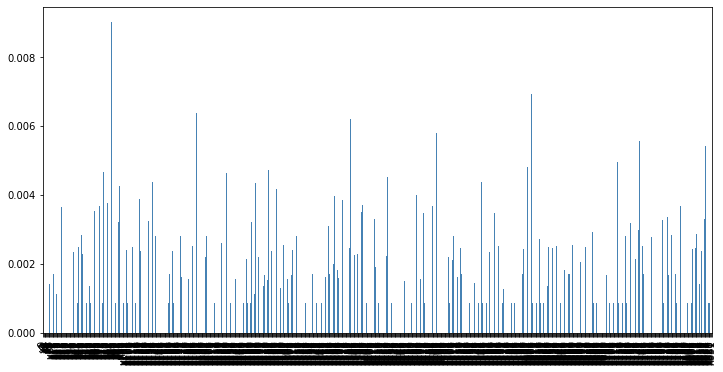

In [26]:
# https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']

clf = DecisionTreeClassifier()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=X.columns[0:]).plot.bar(color='steelblue', figsize=(12, 6))

from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
kepler_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, kepler_X_trans.shape[1]))
columns_retained_FromMode = X.iloc[:, 1:].columns[trans.get_support()].values

In [13]:
#GenericUnivariateSelect
# https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn

from sklearn.feature_selection import GenericUnivariateSelect
import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']

trans = GenericUnivariateSelect(score_func=lambda X, y: X.mean(axis=0), mode='percentile', param=50)
chars_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1], chars_X_trans.shape[1]))


We started with 832 features but retained only 416 of them!


In [18]:
#pt 2
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif

import pandas as pd
import numpy as np
  
xdata = pd.read_csv('x_train_mean.csv',nrows=20)
ydata = pd.read_csv('y_train.csv',nrows=20)

X=xdata.drop(['id'],axis=1)
y=ydata['y']

#kepler_mutual_information = mutual_info_classif(X, y)

trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=50)
kepler_X_trans = trans.fit_transform(X, y)

print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, kepler_X_trans.shape[1]))


We started with 831 features but retained only 416 of them!


In [9]:
#Decision Tree Regression
# http://www.webgraphviz.com then copy .dot file

# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd  

from sklearn.tree import DecisionTreeRegressor  
  
xdata = pd.read_csv('x_train_mean.csv')
ydata = pd.read_csv('y_train.csv')

X=xdata.drop(['id'],axis=1)
y=ydata['y']
    
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 


# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot')


In [5]:
#Feature selection using embedded method
import pandas as pd
import scipy.stats as sst
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

xdata = pd.read_csv('x_train_mean.csv',nrows=10)
ydata = pd.read_csv('y_train.csv',nrows=10)

X=xdata.drop(['id'],axis=1)
y=ydata['y']

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Maximum value in each column : 
6.503016520821267e+18
Maximum value in each column : 
-3.76020076348273e+22
False
True
Best alpha using built-in LassoCV: 31006708878259097960448.000000
Best score using built-in LassoCV: 0.000000


In [49]:
# Feature selection using Pearson Correlation
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import pandas as pd
import scipy.stats as sst
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

xdata = pd.read_csv('X_train.csv')
ydata = pd.read_csv('y_train.csv')

merged = pd.concat([xdata, ydata['y']], axis=1, sort=False)

#df1 = merged.iloc[:, 0:]
#plt.figure(figsize=(len(merged),len(merged)))
cor = merged.corr()
#sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

#Correlation with output variable
cor_target = abs(cor["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

print(merged[['x183','x537']].corr()) # not correlated so we don't drop either


          x183      x537
x183  1.000000 -0.083316
x537 -0.083316  1.000000


In [ ]:
# Feature selection using Chi2 test
#Doesn't work since its a cmbi of features

import pandas as pd
import scipy.stats as sst

xdata = pd.read_csv('X_train.csv')
ydata = pd.read_csv('y_train.csv')

xdatabycol = np.transpose(xdata.values)[1:] #line 0 -> x0 etc.
ydatabycol = np.transpose(ydata.values)[1:][0]

for attr_index in range(len(xdatabycol)):
    #attr_sol = np.column_stack(xdatabycol[attr_index],ydatabycol)
    crosstab = pd.crosstab(xdatabycol[attr_index],ydatabycol)
    chi2,p,_,_ = sst.chi2_contingency(crosstab)
    if (p > 0.05):
        print(attr_index)


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('X_train.csv',nrows=5)

>>> 
>>> X, y = load_iris(return_X_y=True)
>>> X.shape
(150, 4)
>>> clf = ExtraTreesClassifier(n_estimators=50)
>>> clf = clf.fit(X, y)
>>> clf.feature_importances_  
array([ 0.04...,  0.05...,  0.4...,  0.4...])
>>> model = SelectFromModel(clf, prefit=True)
>>> X_new = model.transform(X)
>>> X_new.shape               
(150, 2)

In [ ]:
# 1.13.1. Removing features with low variance


from sklearn.feature_selection import VarianceThreshold
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

df = pd.read_csv ('x_train_KNN.csv',nrows=10)

#p = 0.80
#sel = VarianceThreshold(threshold=(p * (1 - p)))

mapper = DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy())
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

#print(df_fitted)

print(scaled_features_df == df)
print(scaled_features_df)
    
#for index, row in df.iterrows():
#    print(row)
#    for attr in row:
#        print(row(attr))
    
#    print("---------------")
   


# for attr in range(df.shape[1]):
#        print(row)
#        print(attr)
#        if (dfcopy[row][attr] != df_fitted[row][attr]):
#            print(i)
#            print(dfcopy[row][attr])
#            print(df_fitted[row][attr])

np.array_equal(scaled_features_df,df)

In [ ]:
##unsupervised dim reduc https://scikit-learn.org/stable/modules/unsupervised_reduction.html

## FEATURE AGGLOMERATION

from sklearn.cluster import FeatureAgglomeration
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv ('x_train_KNN.csv',nrows=10)
labels = pd.read_csv('Y_train.csv',nrows=10)

#set n_clusters to 2, the output will be two columns of agglomerated features ( iris has 4 features)
agglo=FeatureAgglomeration(n_clusters=2).fit_transform(labels)

print(agglo)
print(agglo[:,0])

#plotting
#color=[]
#for i in labels:
#    if i=='Iris-setosa':
#        color.append('g')
#    if  i=='Iris-versicolor':
#        color.append('b')
#    if i=='Iris-virginica':
#        color.append('r')
#plt.scatter(agglo[:,0],agglo[:,1],c=color)
#plt.show()


